# Comparing the alternating optimization methods
## Classical, AMORS and vector AMORS

Copyright (c) 2024 University of Strasbourg
Author: Massyl Moudoud <mmoudoud@unistra.fr> 
Contributor(s) : Céline Meillier <meillier@unistra.fr>, Vincent Mazet <vincent.mazet@unistra.fr>

This work has been supported by the ANR project DynaSTI: ANR-22-CE45-0008

This software is governed by the CeCILL  license under French law and
abiding by the rules of distribution of free software.  You can  use, 
modify and/ or redistribute the software under the terms of the CeCILL
license as circulated by CEA, CNRS and INRIA at the following URL
"http://www.cecill.info". 

As a counterpart to the access to the source code and  rights to copy,
modify and redistribute granted by the license, users are provided only
with a limited warranty  and the software's author,  the holder of the
economic rights,  and the successive licensors  have only  limited
liability. 

In this respect, the user's attention is drawn to the risks associated
with loading,  using,  modifying and/or developing or reproducing the
software by the user in light of its specific status of free software,
that may mean  that it is complicated to manipulate,  and  that  also
therefore means  that it is reserved for developers  and  experienced
professionals having in-depth computer knowledge. Users are therefore
encouraged to load and test the software's suitability as regards their
requirements in conditions enabling the security of their systems and/or 
data to be ensured and,  more generally, to use and operate it in the 
same conditions as regards security. 

The fact that you are presently reading this means that you have had
knowledge of the CeCILL license and that you accept its terms.

In [1]:
# If you have a valid latex install set to True
# to render figure legends and labels in Latex style
use_Latex = False

In [2]:
# Set paths
import pathlib
try: # Excecuted as script
    script_path = str(pathlib.Path(__file__).parent.resolve()) +"/"
except NameError: # Excecuted as notebook
    script_path = ""

In [6]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import sys


functionPath = script_path + "../src"
sys.path.append(functionPath)

from utile.plot_results_decomposition import plot_results
from utile.eval_error import eval_error, rescale_D_A, rescale_D_A_oracle
from utile.make_noisy_matrix import make_noise
from joint_estimation_A_D.joint_optimization_A_D import joint_estimation_A_D
from joint_estimation_A_D.joint_optimization_A_D_AMORS import joint_estimation_A_D_AMORS
from joint_estimation_A_D.joint_optimization_A_D_vector_AMORS import joint_estimation_A_D_vector_AMORS

In [7]:
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [8]:
# Check is latex is used

if use_Latex:
    matplotlib.rcParams.update({'font.size': 20, 'text.usetex' : True, 'font.family':"ptm"})
    matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
else:
    # Latex install not used
    plt.rcParams.update({'font.size': 20})

# Load simulation data

In [9]:
path =  script_path + "../data/simulation/simulation_A_D_2024_12_18.npz"

data  = np.load(path)
A_VT = data["A"]
D_VT = data["D"]


E, P = D_VT.shape
T = A_VT.shape[1]

D_tilde = np.int32(D_VT != 0)
C_VT = D_VT @ A_VT

In [10]:
C_noise = make_noise(C_VT , 0)

# Set optimization parameters

In [11]:
#set parameters of FISTA

max_iter = 500

#set parameter for A step
lambda_L1_A= 0.08
maxIter_A= 500
lambda_TV= 1
mu = 1

param_A = { "lambda_l1" : lambda_L1_A, "maxIter" : maxIter_A ,
           "lambda_TV" : lambda_TV, "mu":mu } 

#set parameters for D step
lambda_L2_D = 2
maxIter_D= 500

param_D = { "lambda_l2":  lambda_L2_D, "maxIter": maxIter_D}

In [12]:
#intialization
#use mean correlation
C_mean = np.mean(C_noise , axis = 1)

D_init = D_tilde * C_mean[: , np.newaxis] 

# Classical optimization

In [13]:
#set parameter for A step
lambda_L1_A_AM= 0.082

lambda_TV_AM= 1

param_A_AM = { "lambda_l1" : lambda_L1_A_AM, "maxIter" : maxIter_A ,
           "lambda_TV" : lambda_TV_AM, "mu":mu } 

#set parameters for D step
lambda_L2_D_AM = 0.8
    
param_D_AM = { "lambda_l2":  lambda_L2_D_AM, "maxIter": maxIter_D}

In [22]:
D_est , A_est , err = joint_estimation_A_D(C_noise, D_tilde, max_iter,  param_D_AM , param_A_AM,D_init = D_init, ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)

C_est = D_est@A_est

D_est, A_est = rescale_D_A(D_est, A_est)
D_est, A_est = rescale_D_A_oracle(D_est, A_est, D_VT, A_VT)

0
100
200
300
400


In [26]:
# If in notebook
if script_path == "":
    eval_error(C_est , D_est, A_est, C_VT, D_VT, A_VT)

############
error on C is 0.1363487273691997
############
error on D is 0.06757907086265652
############
error on A is 0.23004076322656186


In [1]:
# If in notebook
if script_path == "":
    plot_results(C_est , D_est, A_est, C_VT, D_VT, A_VT )

# AMORS

In [30]:
#set parameters for A step
lambda_L1_A_AMORS= 0.082
lambda_TV_AMORS= 1

param_A_AMORS = { "lambda_l1" : lambda_L1_A_AMORS, "maxIter" : maxIter_A ,
           "lambda_TV" : lambda_TV_AMORS, "mu":mu } 

#set parameters for D step
lambda_L2_D_AMORS = 0.8

param_D_AMORS = { "lambda_l2":  lambda_L2_D_AMORS, "maxIter": maxIter_D}

In [31]:
D_est_AMORS , A_est_AMORS , err_AMORS, gamma_AMORS = joint_estimation_A_D_AMORS(C_noise, D_tilde,
                                                                                max_iter,  param_D_AMORS,
                                                                                param_A_AMORS, D_init = D_init,
                                                                                ret_err =True , C_VT = C_VT, 
                                                                                D_VT = D_VT , A_VT = A_VT)

C_est_AMORS = D_est_AMORS@A_est_AMORS

D_est_AMORS, A_est_AMORS = rescale_D_A(D_est_AMORS, A_est_AMORS)
D_est_AMORS, A_est_AMORS = rescale_D_A_oracle(D_est_AMORS, A_est_AMORS, D_VT, A_VT)

0
100
200
300
400
No norm


In [37]:
# If in notebook
if script_path == "":
    eval_error(C_est_AMORS , D_est_AMORS, A_est_AMORS, C_VT, D_VT, A_VT)

############
error on C is 0.12633459328632174
############
error on D is 0.09509628208242273
############
error on A is 0.27246903482811946


In [2]:
# If in notebook
if script_path == "":
    plot_results(C_est_AMORS , D_est_AMORS, A_est_AMORS, C_VT, D_VT, A_VT )

# Vector AMORS

In [11]:
#set parameter for A step
lambda_L1_A_VectAMORS = 0.01#*np.sqrt(1/np.sum(D_tilde, axis =0))#np.array([2, 1,1, 2, 1, 1])
lambda_TV_VectAMORS = 0.4#np.ones(P)

param_A_VectAMORS = { "lambda_l1" : lambda_L1_A_VectAMORS, "maxIter" : maxIter_A ,
           "lambda_TV" : lambda_TV_VectAMORS, "mu":mu } 

#set parameters for D step
lambda_L2_D_VectAMORS = 0.656

param_D_VectAMORS = { "lambda_l2":  lambda_L2_D_VectAMORS, "maxIter": maxIter_D}

In [12]:
D_est_VectAMORS , A_est_VectAMORS , err_VectAMORS, gamma_VectAMORS = joint_estimation_A_D_vector_AMORS(C_noise, D_tilde, max_iter,  param_D_VectAMORS , param_A_VectAMORS, D_init = D_init, ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)

C_est_VectAMORS = D_est_VectAMORS@A_est_VectAMORS

D_est_VectAMORS, A_est_VectAMORS = rescale_D_A(D_est_VectAMORS, A_est_VectAMORS)
D_est_VectAMORS, A_est_VectAMORS = rescale_D_A_oracle(D_est_VectAMORS, A_est_VectAMORS, D_VT, A_VT)

0
100
200
300
400


In [17]:
# If in notebook
if script_path == "":
    eval_error(C_est_VectAMORS , D_est_VectAMORS, A_est_VectAMORS, C_VT, D_VT, A_VT)

############
error on C is 0.11130126310790456
############
error on D is 0.052763861308895495
############
error on A is 0.17689369216133174


In [3]:
# If in notebook
if script_path == "":
    plot_results(C_est_VectAMORS , D_est_VectAMORS, A_est_VectAMORS, C_noise, D_VT, A_VT)

# Rescaled D_init

In [138]:
## scalar factor

In [41]:
factor_scalar = 10
D_init_scalar_rescale = factor_scalar * D_tilde * C_mean[: , np.newaxis]

In [42]:
# AM
D_est_scalar_rescale , A_est_scalar_rescale , err_scalar_rescale = joint_estimation_A_D(C_noise, D_tilde, max_iter,  param_D_AM , param_A_AM,D_init = D_init_scalar_rescale, ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)
C_est_scalar_rescale = D_est_scalar_rescale @ A_est_scalar_rescale
D_est_scalar_rescale, A_est_scalar_rescale = rescale_D_A(D_est_scalar_rescale, A_est_scalar_rescale)
D_est_scalar_rescale, A_est_scalar_rescale = rescale_D_A_oracle(D_est_scalar_rescale, A_est_scalar_rescale, D_VT, A_VT)

0
100
200
300
400
Max D
No norm


In [44]:
# If in notebook
if script_path == "":
    eval_error(C_est_scalar_rescale, D_est_scalar_rescale, A_est_scalar_rescale, C_VT, D_VT, A_VT)

############
error on C is 0.1512654660306096
############
error on D is 0.47163933695445537
############
error on A is 0.6838201689839044


In [4]:
# If in notebook
if script_path == "":
    plot_results(C_est_scalar_rescale , D_est_scalar_rescale, A_est_scalar_rescale, C_noise, D_VT, A_VT)

In [46]:
# AMORS
D_est_AMORS_scalar_rescale , A_est_AMORS_scalar_rescale , err_AMORS_scalar_rescale, gamma_AMORS_scalar_rescale = joint_estimation_A_D_AMORS(C_noise, D_tilde,max_iter,  param_D_AMORS,param_A_AMORS, D_init = D_init_scalar_rescale,ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)
C_est_AMORS_scalar_rescale = D_est_AMORS_scalar_rescale@A_est_AMORS_scalar_rescale
D_est_AMORS_scalar_rescale, A_est_AMORS_scalar_rescale = rescale_D_A(D_est_AMORS_scalar_rescale, A_est_AMORS_scalar_rescale)
D_est_AMORS_scalar_rescale, A_est_AMORS_scalar_rescale = rescale_D_A_oracle(D_est_AMORS_scalar_rescale, A_est_AMORS_scalar_rescale, D_VT, A_VT)

0
100
200
300
400
No norm


In [48]:
# If in notebook
if script_path == "":
    eval_error(C_est_AMORS_scalar_rescale, D_est_AMORS_scalar_rescale, A_est_AMORS_scalar_rescale, C_VT, D_VT, A_VT)

############
error on C is 0.12633459328549362
############
error on D is 0.09509628207665569
############
error on A is 0.2724690348021147


In [5]:
# If in notebook
if script_path == "":
    plot_results(C_est_AMORS_scalar_rescale , D_est_AMORS_scalar_rescale, A_est_AMORS_scalar_rescale, C_noise, D_VT, A_VT)

In [51]:
# VectAMORS
D_est_VectAMORS_scalar_rescale , A_est_VectAMORS_scalar_rescale , err_VectAMORS_scalar_rescale, gamma_VectAMORS_scalar_rescale = joint_estimation_A_D_vector_AMORS(C_noise, D_tilde, max_iter,  param_D_VectAMORS , param_A_VectAMORS, D_init = D_init_scalar_rescale, ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)
C_est_VectAMORS_scalar_rescale = D_est_VectAMORS_scalar_rescale@A_est_VectAMORS_scalar_rescale
D_est_VectAMORS_scalar_rescale, A_est_VectAMORS_scalar_rescale = rescale_D_A(D_est_VectAMORS_scalar_rescale, A_est_VectAMORS_scalar_rescale)
D_est_VectAMORS_scalar_rescale, A_est_VectAMORS_scalar_rescale = rescale_D_A_oracle(D_est_VectAMORS_scalar_rescale, A_est_VectAMORS_scalar_rescale, D_VT, A_VT)

0
100
200
300
400
is took 51.882368087768555


In [52]:
# If in notebook
if script_path == "":    
    eval_error(C_est_VectAMORS_scalar_rescale, D_est_VectAMORS_scalar_rescale, A_est_VectAMORS_scalar_rescale, C_VT, D_VT, A_VT)

############
error on C is 0.11130126310790453
############
error on D is 0.052763861308895446
############
error on A is 0.17689369216133058


In [6]:
# If in notebook
if script_path == "":
    plot_results(C_est_VectAMORS_scalar_rescale , D_est_VectAMORS_scalar_rescale, A_est_VectAMORS_scalar_rescale, C_noise, D_VT, A_VT)

In [54]:
## vector factor

In [55]:
factor_vector = np.array([ 2,  4, 9, 10,  8,  7])
D_init_vector_rescale = factor_vector * D_tilde * C_mean[: , np.newaxis]

In [56]:
# AM
D_est_vector_rescale , A_est_vector_rescale , err_vector_rescale = joint_estimation_A_D(C_noise, D_tilde, max_iter,  param_D_AM , param_A_AM,D_init = D_init_vector_rescale, ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)
C_est_vector_rescale = D_est_vector_rescale@A_est_vector_rescale
D_est_vector_rescale, A_est_vector_rescale = rescale_D_A(D_est_vector_rescale, A_est_vector_rescale)
D_est_vector_rescale, A_est_vector_rescale = rescale_D_A_oracle(D_est_vector_rescale, A_est_vector_rescale, D_VT, A_VT)

0
100
200
300
400
Max D
No norm


In [58]:
# If in notebook
if script_path == "":
    eval_error(C_est_vector_rescale, D_est_vector_rescale, A_est_vector_rescale, C_VT, D_VT, A_VT)

############
error on C is 0.1515319326975355
############
error on D is 0.44850150658403054
############
error on A is 0.6886646630131203


In [7]:
# If in notebook
if script_path == "":
    plot_results(C_est_vector_rescale , D_est_vector_rescale, A_est_vector_rescale, C_noise, D_VT, A_VT)

In [60]:
# AMORS
D_est_AMORS_vector_rescale , A_est_AMORS_vector_rescale , err_AMORS_vector_rescale, gamma_AMORS_vector_rescale = joint_estimation_A_D_AMORS(C_noise, D_tilde,max_iter, param_D_AMORS,param_A_AMORS, D_init = D_init_vector_rescale,ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)
C_est_AMORS_vector_rescale = D_est_AMORS_vector_rescale@A_est_AMORS_vector_rescale
D_est_AMORS_vector_rescale, A_est_AMORS_vector_rescale = rescale_D_A(D_est_AMORS_vector_rescale, A_est_AMORS_vector_rescale)
D_est_AMORS_vector_rescale, A_est_AMORS_vector_rescale = rescale_D_A_oracle(D_est_AMORS_vector_rescale, A_est_AMORS_vector_rescale, D_VT, A_VT)

0
100
200
300
400
Max D
No norm
No norm
No norm


In [61]:
# If in notebook
if script_path == "":
    eval_error(C_est_AMORS_vector_rescale, D_est_AMORS_vector_rescale, A_est_AMORS_vector_rescale, C_VT, D_VT, A_VT)

############
error on C is 0.13783651114621678
############
error on D is 0.5047797464188468
############
error on A is 0.7117187990483324


In [8]:
# If in notebook
if script_path == "":
    plot_results(C_est_AMORS_vector_rescale , D_est_AMORS_vector_rescale, A_est_AMORS_vector_rescale, C_noise, D_VT, A_VT)

In [63]:
# VectAMORS
D_est_VectAMORS_vector_rescale , A_est_VectAMORS_vector_rescale , err_VectAMORS_vector_rescale, gamma_VectAMORS_vector_rescale = joint_estimation_A_D_vector_AMORS(C_noise, D_tilde, max_iter,  param_D_VectAMORS , param_A_VectAMORS, D_init = D_init_vector_rescale, ret_err =True , C_VT = C_VT, D_VT = D_VT , A_VT = A_VT)
C_est_VectAMORS_vector_rescale = D_est_VectAMORS_vector_rescale@A_est_VectAMORS_vector_rescale
D_est_VectAMORS_vector_rescale, A_est_VectAMORS_vector_rescale = rescale_D_A(D_est_VectAMORS_vector_rescale, A_est_VectAMORS_vector_rescale)
D_est_VectAMORS_vector_rescale, A_est_VectAMORS_vector_rescale = rescale_D_A_oracle(D_est_VectAMORS_vector_rescale, A_est_VectAMORS_vector_rescale, D_VT, A_VT)

0
100
200
300
400


In [65]:
# If in notebook
if script_path == "":
    eval_error(C_est_VectAMORS_vector_rescale, D_est_VectAMORS_vector_rescale, A_est_VectAMORS_vector_rescale, C_VT, D_VT, A_VT)

############
error on C is 0.11130126310790467
############
error on D is 0.05395309138171026
############
error on A is 0.1757586383675917


In [9]:
# If in notebook
if script_path == "":
    plot_results(C_est_VectAMORS_vector_rescale , D_est_VectAMORS_vector_rescale, A_est_VectAMORS_vector_rescale, C_noise, D_VT, A_VT)

### Joint plots

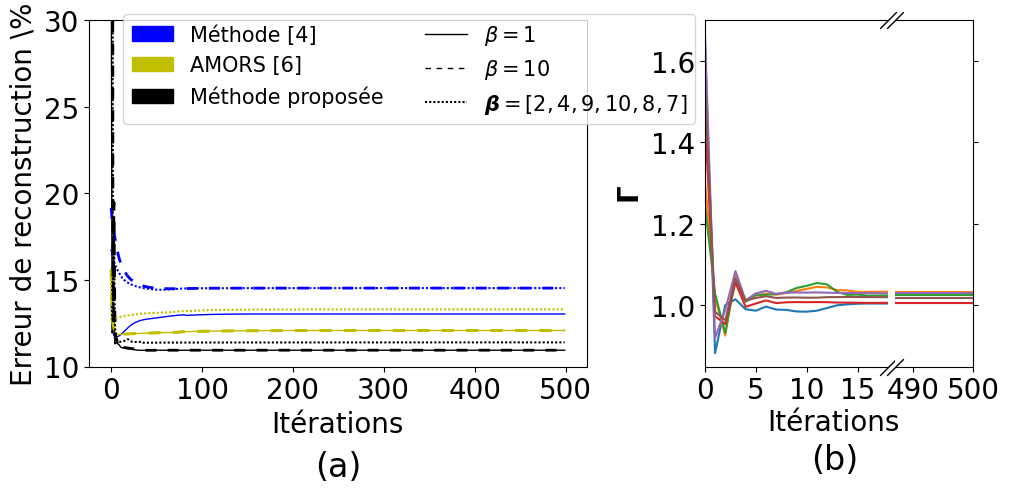

In [17]:
### Which matrix
i = 1
# Normalize to have error in percent
norm_C = np.linalg.norm(C_VT, ord ="fro")/100

# crreate figure and subfigure
fig = plt.figure( figsize=(10, 4.5))

subfig1, subfig2 = fig.subfigures(1, 2, wspace=0.02, width_ratios = [0.65, 0.35])

#################################################################################################
# Convergence curves
ax1 = subfig1.subplots(1,1)

# D_init
## AM
ax1.plot(err[:, i]/norm_C, "b",  linewidth= 1)
## AMORS
ax1.plot(err_AMORS[:, i]/norm_C, "y",  linewidth= 1)
##VectAMORS
ax1.plot(err_VectAMORS[:, i]/norm_C, "k",  linewidth= 1)

# Scalar rescale
## AM
ax1.plot(err_scalar_rescale[:, i]/norm_C, "b", linestyle =  (0, (4, 4)), linewidth= 2)
## AMORS
ax1.plot(err_AMORS_scalar_rescale[:, i]/norm_C, "y", linestyle =  (0, (4, 4)), linewidth= 2.2)
##VectAMORS
ax1.plot(err_VectAMORS_scalar_rescale[:, i]/norm_C, "k", linestyle =  (0, (4, 4)), linewidth= 2)

# Vector rescale
## AM
ax1.plot(err_vector_rescale[:, i]/norm_C, "b", linestyle =  (0, (1, 1)), linewidth= 1.5)
## AMORS
ax1.plot(err_AMORS_vector_rescale[:, i]/norm_C, color = "y", linestyle =  (0, (1, 1)), linewidth= 1.5)
## VectAMORS
ax1.plot(err_VectAMORS_vector_rescale[:, i]/norm_C, "k", linestyle =  (0, (1, 1)), linewidth= 1.5)

###########################################################
# Legend
AM_patch = mpatches.Patch(color='b', label='Méthode [4]')
AMORS_patch = mpatches.Patch(color='y', label='AMORS [6]')
VectAMORS_patch = mpatches.Patch(color='k', label='Méthode proposée')

init_line = mlines.Line2D([], [], color='k', linewidth= 1,
                          label=r"$\beta =1$")
scalar_rescale_line = mlines.Line2D([], [], color='k', linestyle =  (0, (4, 4)), linewidth= 1,
                          label=rf"$\beta ={factor_scalar}$")

vector_rescale_line = mlines.Line2D([], [], color='k', linestyle =  (0, (1, 1)), linewidth= 1.5,
                          label=r"$\boldsymbol{\beta} = "+f"{list(factor_vector)}$")

ax1.legend(loc = (0.07, 0.7), ncol=2, fontsize = 15,  handles=[AM_patch, AMORS_patch, VectAMORS_patch, init_line, scalar_rescale_line, vector_rescale_line])

ax1.set_xlabel("Itérations")
ax1.set_xticks(np.arange(0,501, 100))
ax1.set_ylabel("Erreur de reconstruction \%")
ax1.set_ylim((10, 30))
ax1.set_title("(a)", y = -0.34)

###################################################################################################
## Gamma
ax2, ax3  = subfig2.subplots(1, 2, width_ratios= [0.7, 0.3], sharey=True)
subfig2.subplots_adjust(wspace=0.05)  # adjust space between Axes

# plot the same data on both Axes
ax2.plot(gamma_VectAMORS)
ax3.plot(gamma_VectAMORS)

# zoom-in / limit the view to different portions of the data
ax2.set_xlim(0 , 18)  # outliers only
ax3.set_xlim(487, 500)  # most of the data

# hide the spines between ax and ax3
ax2.spines.right.set_visible(False)
ax3.spines.left.set_visible(False)
#ax2.xaxis.tick_top()
#ax2.tick_params(labeltop=False)  # don't put tick labels at the top
ax3.yaxis.tick_right()

# Draw the broken lines between the axes
d = 1 # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax2.plot([1, 1], [1, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 0], [0, 1], transform=ax3.transAxes, **kwargs)


# Set x_ticks
ax2.set_xticks([0, 5,  10, 15])
ax3.set_xticks([490, 500])
#ax2.tick_params(axis= "x", labelrotation = 80)
#ax3.tick_params(axis= "x", labelrotation = 80)


# Set axes labels
ax2.set_xlabel("Itérations")
ax2.xaxis.set_label_coords( 0.7, -0.12)

ax2.set_ylabel(r"$\boldsymbol{\Gamma}$")
ax2.set_ylim((0.85,1.7))

subfig2.suptitle("(b)", y = -0.06)


########################################################################################

plt.savefig(script_path+ "./figs/Figure4.pdf",  bbox_inches='tight')

# If in script close the figures
if script_path != "":
    plt.close("all")

In [75]:
# Save simulation results

np.savez(script_path+"results_simulations_26_03_FISTA", 
        D_est , A_est , err,
        D_est_AMORS , A_est_AMORS , err_AMORS, gamma_AMORS,
        D_est_VectAMORS , A_est_VectAMORS , err_VectAMORS, gamma_VectAMORS,
        D_est_scalar_rescale , A_est_scalar_rescale , err_scalar_rescale,
        D_est_AMORS_scalar_rescale , A_est_AMORS_scalar_rescale , err_AMORS_scalar_rescale, gamma_AMORS_scalar_rescale,
        D_est_VectAMORS_scalar_rescale , A_est_VectAMORS_scalar_rescale , err_VectAMORS_scalar_rescale, gamma_VectAMORS_scalar_rescale,
        D_est_vector_rescale , A_est_vector_rescale , err_vector_rescale,
        D_est_AMORS_vector_rescale , A_est_AMORS_vector_rescale , err_AMORS_vector_rescale, gamma_AMORS_vector_rescale ,
        D_est_VectAMORS_vector_rescale , A_est_VectAMORS_vector_rescale , err_VectAMORS_vector_rescale, gamma_VectAMORS_vector_rescale,
        factor_scalar, factor_vector
        )

In [14]:
var_names = ["D_est","A_est","err",
"D_est_AMORS","A_est_AMORS","err_AMORS","gamma_AMORS",
"D_est_VectAMORS","A_est_VectAMORS","err_VectAMORS","gamma_VectAMORS",
"D_est_scalar_rescale","A_est_scalar_rescale","err_scalar_rescale",
"D_est_AMORS_scalar_rescale","A_est_AMORS_scalar_rescale","err_AMORS_scalar_rescale","gamma_AMORS_scalar_rescale",
"D_est_VectAMORS_scalar_rescale","A_est_VectAMORS_scalar_rescale","err_VectAMORS_scalar_rescale","gamma_VectAMORS_scalar_rescale",
"D_est_vector_rescale","A_est_vector_rescale","err_vector_rescale","D_est_AMORS_vector_rescale","A_est_AMORS_vector_rescale","err_AMORS_vector_rescale","gamma_AMORS_vector_rescale",
"D_est_VectAMORS_vector_rescale","A_est_VectAMORS_vector_rescale","err_VectAMORS_vector_rescale","gamma_VectAMORS_vector_rescale",
"factor_scalar", "factor_vector"           
            ]

In [16]:
load_results = False
if load_results:
    data =  np.load(script_path+"results_simulations_26_03_FISTA.npz")
    for var, file in zip(var_names,data.files):
        exec(f"{var} = data['{file}']")